<a href="https://colab.research.google.com/github/kateh321/sciprog_21/blob/main/MathMODEL2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib.pyplot as plt
from skimage.transform import resize
get_ipython().run_line_magic('matplotlib', 'inline')
################################################################################
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
################################################################################
from keras import layers,utils
from keras.datasets import cifar100
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D, MaxPool2D,Add, concatenate
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report


from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from keras.applications.vgg16 import VGG16
from keras.applications import vgg19

################################################################################

In [3]:
!wget -O PBC_dataset_normal_DIB.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded

--2022-05-01 07:03:20--  https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b [following]
--2022-05-01 07:03:20--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.92.1.26
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.92.1.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281366219 (268M) [application/zip

In [4]:
!unzip "/content/PBC_dataset_normal_DIB.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_292483.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_n

In [5]:
!pip install split-folders

In [6]:
import splitfolders
#Split data into train/val/test
splitfolders.ratio('PBC_dataset_normal_DIB', output="PBC_dataset_normal_DIB_pre", seed=777, ratio=(.70, .15, .15)) 

Copying files: 17092 files [00:02, 6119.29 files/s]


In [7]:
#paths for folders
data_path = 'PBC_dataset_normal_DIB_pre'
print("The Folders in Data Directory is:  ",os.listdir(data_path))

The Folders in Data Directory is:   ['train', 'test', 'val']


In [8]:
#Show number and name of classes in dataset
classes = os.listdir(data_path + "/train")
print(classes)
print("Classes Length: ",len(classes))

['erythroblast', 'basophil', 'lymphocyte', 'neutrophil', 'eosinophil', 'platelet', 'ig', 'monocyte']
Classes Length:  8


In [9]:
#Data Augmentation 
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   vertical_flip=True,
                                   rotation_range=90
                                   )
val_datagen   = ImageDataGenerator()

train_dataset = train_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/train',
    seed=777,
    target_size=(128,128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

val_dataset = val_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/val',
    seed=777,
    target_size=(128,128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

Found 11959 images belonging to 8 classes.
Found 2561 images belonging to 8 classes.


In [3]:
from tensorflow.keras.layers import BatchNormalization
reg = keras.regularizers.l1(0.0001)
#

In [4]:
#model 1

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))



In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 256)       73984     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                      

In [19]:
#Compile model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-9)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#Use call backs for best to monitor accuracy
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
filepath="'/Content/MyDrive/Model.h5/modelbest.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [20]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 100,  
                      validation_data=val_dataset,
                      epochs=50,
                      validation_steps = 28,
                      callbacks = [learn_control, checkpoint]
                      )

#Epochs

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 17.4866 - accuracy: 0.4441
Epoch 1: val_accuracy did not improve from 0.86384
100/100 [==============================] - 40s 389ms/step - loss: 17.4866 - accuracy: 0.4441 - val_loss: 4.2946 - val_accuracy: 0.2031 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 2.4771 - accuracy: 0.6472
Epoch 2: val_accuracy did not improve from 0.86384
100/100 [==============================] - 38s 382ms/step - loss: 2.4771 - accuracy: 0.6472 - val_loss: 2.5013 - val_accuracy: 0.5324 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 2.0542 - accuracy: 0.7169
Epoch 3: val_accuracy did not improve from 0.86384
100/100 [==============================] - 38s 385ms/step - loss: 2.0542 - accuracy: 0.7169 - val_loss: 2.3424 - val_accuracy: 0.5346 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 1.5741 - accuracy: 0.7553
Epoch 4: val_accurac

In [17]:
 keras.backend.clear_session() # Use this function to clear any prevuiusly stored model data

In [21]:
# Function for plotting

def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

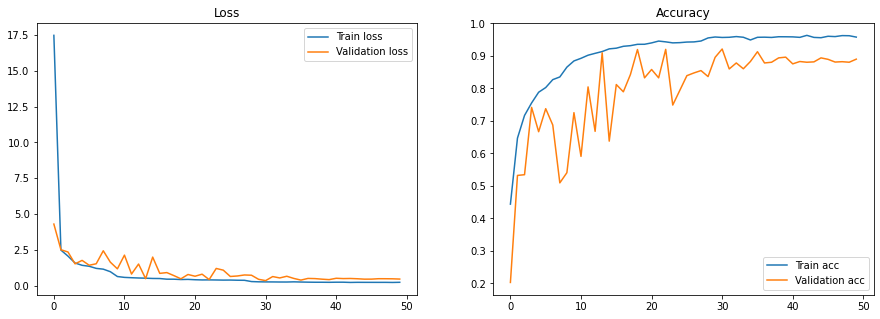

In [22]:
#Show learning curve
show_final_history(model_fit) 

In [23]:
test_datagen   = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/test',
    seed=777,
    target_size=(128, 128),
    batch_size=64,
    class_mode = 'categorical')

Found 2572 images belonging to 8 classes.


In [24]:
valid_loss, valid_accuracy = model.evaluate(val_dataset)
test_loss, test_accuracy   = model.evaluate(test_dataset)

41/41 [==============================] - 6s 139ms/step - loss: 0.4772 - accuracy: 0.8857


In [25]:
print('Validation Accuracy: ', round((valid_accuracy * 100), 1), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 1), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 1))
print('Test Loss: ', round(test_loss, 1))

Validation Accuracy:  88.5 %
Test Accuracy:  88.6 %
 
Validation Loss:  0.5
Test Loss:  0.5


In [30]:
test_steps = test_dataset.n // test_dataset.batch_size
print(test_steps)

40


In [31]:
test_dataset.reset()
X_test_, y_test_true = [],[] 
for i in range(test_steps):
    X , y = next(test_dataset)
    X_test_.extend(X) 
    y_test_true.extend(y)

In [32]:
X_test_    = np.array(X_test_)
y_test_true= np.array(y_test_true)
print(X_test_.shape, y_test_true.shape)

(2560, 128, 128, 3) (2560, 8)


In [33]:
y_pred = model.predict(X_test_)


In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

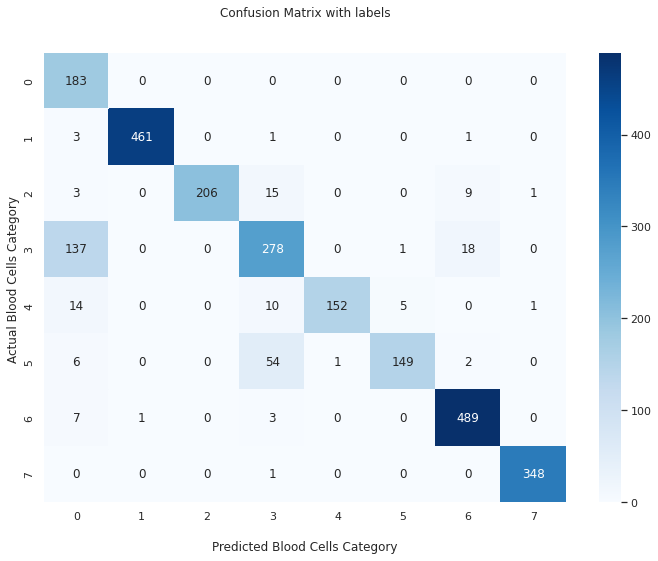

In [35]:
confusionMatrix = confusion_matrix(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1))

ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Blood Cells Category')
ax.set_ylabel('Actual Blood Cells Category ');

# ax.xaxis.set_ticklabels(classes)
# ax.yaxis.set_ticklabels(classes)

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
print(classification_report(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1),zero_division=0))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       183
           1       1.00      0.99      0.99       466
           2       1.00      0.88      0.94       234
           3       0.77      0.64      0.70       434
           4       0.99      0.84      0.91       182
           5       0.96      0.70      0.81       212
           6       0.94      0.98      0.96       500
           7       0.99      1.00      1.00       349

    accuracy                           0.89      2560
   macro avg       0.90      0.88      0.87      2560
weighted avg       0.91      0.89      0.89      2560



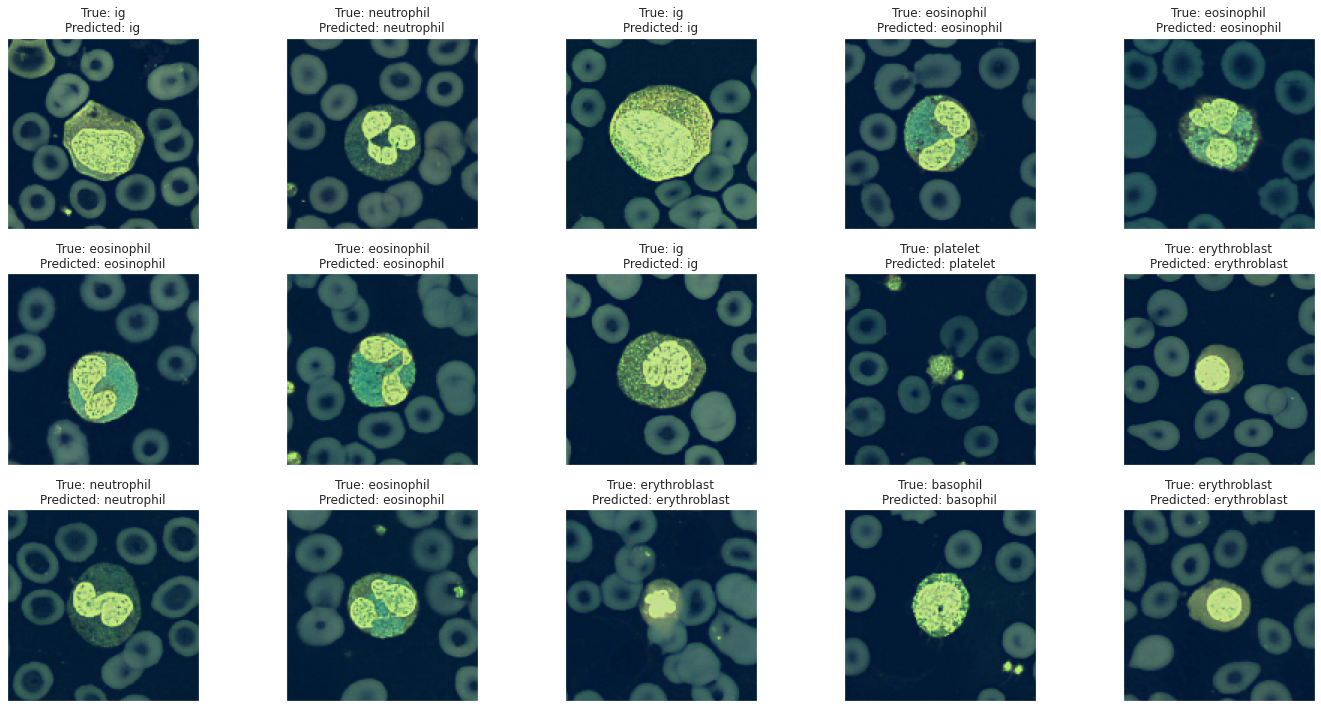

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow((X_test_[i]* 255).astype(np.uint8))
  ax.set_title(f"True: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_test_true, axis=1)[i])]}\nPredicted: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_pred, axis=1)[i])]}")
plt.tight_layout()
plt.show();

In [ ]:
#Precision - number of true positives/ number true + False positives - which ones are correct positives
#Recall - number of true positive/number of true positive + numbre of false negatives - how many you accurately classify
#f1-score - Naturalisation way of looking of precision/recall. Multiply precision*recall/precision+recall 
#Accuracy = True positive+Truenegaive/True positive + True negative + False positive + False negative 
#Support - Number of data points for the class
#

In [ ]:
!pip install pyyaml h5py 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import h5py

In [ ]:
model2.summary()

In [ ]:
model2.save('/Content/MyDrive/Model.h5/model2.h5')